# **Images Processing**

## **Requirements**

Here we gather the required libraries, classes and function for this notebook.

In [1]:
import polars as pl
import numpy as np
from PIL import Image
import os
import sys

`PyImageML` is a Python package that has been developed under this project, which has several utils for plotting images and extracting features from them, features that later could be used along with Machine Learning algorithms to solve typical ML tasks.


In [2]:
sys.path.insert(0, r"C:\Users\fscielzo\Documents\Packages\PyImageML_Package_Private")
from PyImageML.preprocessing import ImageFeaturesExtraction
from PyImageML.plots import plot_images

## **Data description**

We are going to work with a subset of the Fire-Flame-Dataset, which is available through this link:

https://github.com/DeepQuestAI/Fire-Smoke-Dataset

This data-sets consist of images, some of them contains fire elements and others not, so, the images are classified according to two categories:

* **Neutral (class 0)**
* **Fire (class 1)**

In order to make this binary classification problem perfectly balanced, we have chosen a subset of images in such a way that both classes have the same number of images.

## **Reading the data**

In this section we are going to read an process the data a little bit.

- `files_list.txt` is a txt file with two 'columns', the first one with the old paths of the images of the data-set, and the second with the images class (neutral (0) or fire (1)).

-  We read `files_list.txt as a data-frame.

- We extract the names of the images files.

- We build a list with the new path of the images.

In [3]:
# Extracting the names of the images files as well as their class/category.
files_list_name = r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\files_list.txt'
files_df = pl.read_csv(files_list_name, separator='\t', has_header=False, new_columns=['path', 'class'])
img_files_names = [files_df['path'][i].split('/')[1] for i in range(len(files_df))]

# building a list with the current paths of the data-set images.
img_path_list = []
folder_path = r'C:\Users\fscielzo\Documents\DataScience-GitHub\Image Analysis\Image-Classification\Fire-Detection\Data'
for filename in img_files_names:
    img_path_list.append(os.path.join(folder_path, filename))

Data-frame with old images path and their classes:

In [4]:
print(files_df.head(4))

shape: (4, 2)
┌───────────────────────┬───────┐
│ path                  ┆ class │
│ ---                   ┆ ---   │
│ str                   ┆ i64   │
╞═══════════════════════╪═══════╡
│ Train_Set/image_1.jpg ┆ 0     │
│ Train_Set/image_2.jpg ┆ 0     │
│ Train_Set/image_3.jpg ┆ 0     │
│ Train_Set/image_4.jpg ┆ 0     │
└───────────────────────┴───────┘


In [5]:
print(files_df.tail(4))

shape: (4, 2)
┌────────────────────────┬───────┐
│ path                   ┆ class │
│ ---                    ┆ ---   │
│ str                    ┆ i64   │
╞════════════════════════╪═══════╡
│ Test_Set/image_297.jpg ┆ 1     │
│ Test_Set/image_298.jpg ┆ 1     │
│ Test_Set/image_299.jpg ┆ 1     │
│ Test_Set/image_300.jpg ┆ 1     │
└────────────────────────┴───────┘


A list with the current paths of the images:

In [6]:
img_path_list[0:5]

['C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_1.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_2.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_3.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_4.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_5.jpg']

## **Defining Response and Predictors**

In this section we define the response and predictors.

- **Predictors:** a list with the paths of the images files.
- **Response:** a vector (1D array) that identify the category of each image.


In [7]:
Y = files_df['class'].to_numpy()
X = img_path_list 

In [8]:
X[0:5]

['C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_1.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_2.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_3.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_4.jpg',
 'C:\\Users\\fscielzo\\Documents\\DataScience-GitHub\\Image Analysis\\Image-Classification\\Fire-Detection\\Data\\image_5.jpg']

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

## **Visualizing the images**

In this section we are going to visualize the images with which we are working, in other words our images data-set.



The next code transform each image of `X` in an pixels array, this is a typical way of characterizing images numerically, in other words, of extracting numerical features from raw images.

Then the a list of 15 pixels arrays (chosen randomly) are plotted using `plot_images` custom function.

`plot_images`  is capable to plot a given list of pixels arrays as images.

In [10]:
# Defining the desireable size of the images
img_height = 240
img_width = 275

# Extracting pixels features from the images and preserving their color (non converting into gray scale).
image_feature_extraction = ImageFeaturesExtraction(method='pixels', image_height=img_height, image_width=img_width, convert_to_gray=False, format='array')
X_color = image_feature_extraction.fit_transform(X)

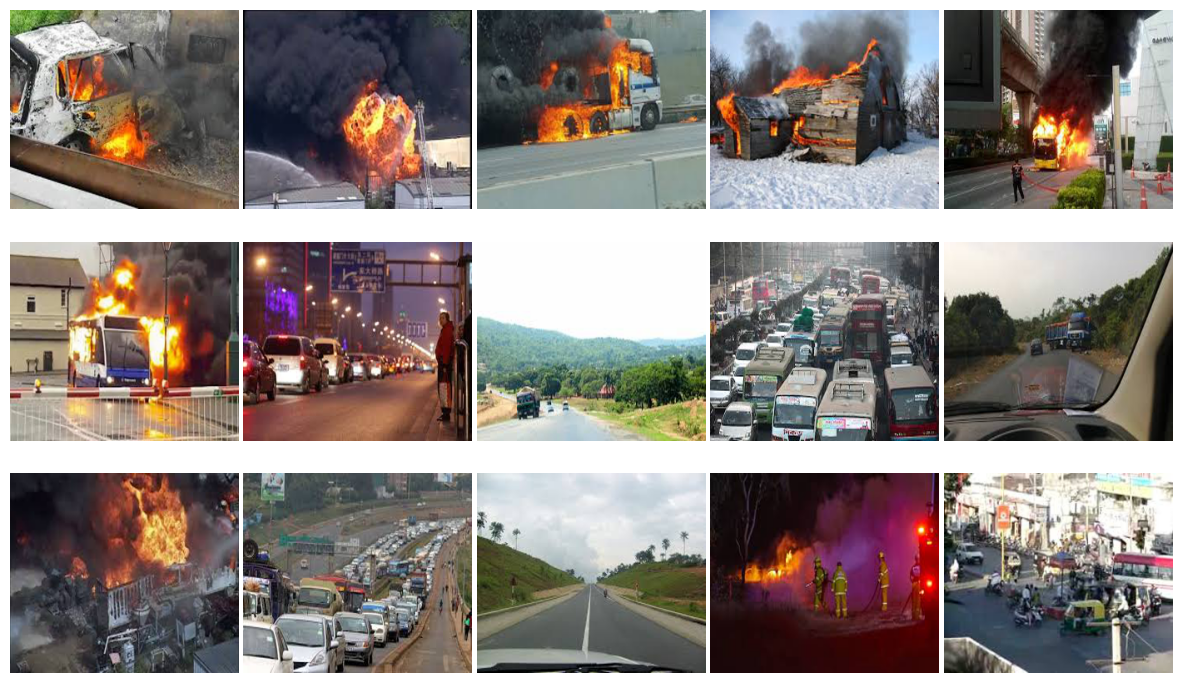

In [11]:
# Plotting 'n_img_to_plot' random images from the data-set.
np.random.seed(123)
n_img_to_plot = 15
random_idx = np.random.choice(range(len(X_color)), n_img_to_plot, replace=False)
plot_images(X_color[random_idx], image_height=img_height, image_width=img_width, 
            figsize=(15, 9), n_rows=3, gray_scale=False, hspace=0.01, wspace=0.02)

## **The basics of working with images in `Python`**

Once we have the paths of the images we are going to work with (in our case stored in `X`), we can start processing them in `Python`.

In this section we will cover the basic about working with images in Python, but in further section more advanced procedures will be presented, like filters, equalization and feature extraction methods.

### **Reading images**

We can use `PIL` library to read images in `Python`.

In [12]:
example_img = Image.open(X[2])

### **Size of an image**

In [13]:
example_img.size

(277, 182)

### **Resizing images**

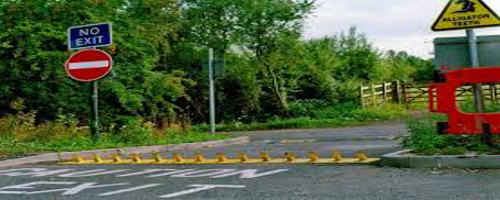

In [14]:
example_img.resize((500, 200))

### **Converting to gray scale**

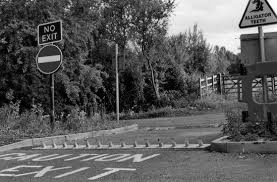

In [15]:
example_img.convert('L')

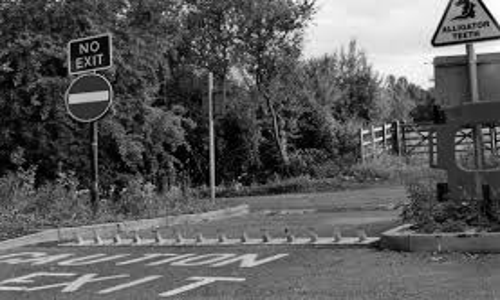

In [16]:
example_img.convert('L').resize((500, 300))